In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 15)
plt.style.use('ggplot')
sns.set_style("whitegrid")

# Loading the previous dataset

Let's load the dataset that we previously generated to answer the questions that we have. We can also just use the xlsx file to load it, but I prefer to save it as csv then use that.

In [2]:
# Load the Excel file
excel_file = pd.ExcelFile('data_modeling_final.xlsx')

# Get the list of sheet names
sheet_names = excel_file.sheet_names

# Iterate through each sheet
for sheet_name in sheet_names:
    # Read the sheet into a DataFrame, skipping the first row because they added some background color on it.
    df = excel_file.parse(sheet_name, dtype=str)  # Column as str

    # Save the DataFrame to a CSV file
    csv_file_name = f'{sheet_name}_final.csv'
    df.to_csv(csv_file_name, index=False)

    print(f'{csv_file_name} saved successfully.')

Cleaned Data_final.csv saved successfully.
Top 5 Category by Score_final.csv saved successfully.


# Final Content Dataset

In [3]:
df = pd.read_csv('Cleaned Data_final.csv')
df

,content_id,category_type,category,reaction_type,datetime,sentiment,score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-04-09 02:46:20,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating,disgust,2021-03-28 21:15:26,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating,disgust,2020-08-04 05:40:33,negative,0
...,...,...,...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism,adore,2020-10-04 22:26:33,positive,72
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism,adore,2020-09-18 10:50:50,positive,72
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,gif,culture,adore,2020-10-31 03:58:44,positive,72
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,gif,culture,adore,2020-06-25 15:12:29,positive,72


## Cleaning the data

Just to be sure let's double check the final content before we proceed in analysis.

#### Checking for null values

In [4]:
df.isnull().sum()

content_id       0
category_type    0
category         0
reaction_type    0
datetime         0
sentiment        0
score            0
dtype: int64

#### Checking for duplicate values

We don't need to check for duplicates since this dataset is a content.

#### Changing datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content_id     24573 non-null  object
 1   category_type  24573 non-null  object
 2   category       24573 non-null  object
 3   reaction_type  24573 non-null  object
 4   datetime       24573 non-null  object
 5   sentiment      24573 non-null  object
 6   score          24573 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [6]:
dtypes = {
    'reaction_type': 'category',
    'datetime': 'datetime64',
    'category_type': 'category',
    'category': 'category',
    'sentiment': 'category',
}

df = df.astype(dtypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   content_id     24573 non-null  object        
 1   category_type  24573 non-null  category      
 2   category       24573 non-null  category      
 3   reaction_type  24573 non-null  category      
 4   datetime       24573 non-null  datetime64[ns]
 5   sentiment      24573 non-null  category      
 6   score          24573 non-null  int64         
dtypes: category(4), datetime64[ns](1), int64(1), object(1)
memory usage: 673.7+ KB


#### Checking the categories if there is inconsistency

In [7]:
for x in df.reaction_type.unique():
    print(x)

disgust
dislike
scared
interested
peeking
cherish
hate
love
indifferent
super love
intrigued
worried
like
heart
want
adore


In [8]:
df.category_type.unique()

['photo', 'video', 'gif', 'audio']
Categories (4, object): ['audio', 'gif', 'photo', 'video']

In [9]:
for x in df.category.unique():
    print(x)

studying
healthy eating
dogs
public speaking
science
tennis
food
fitness
soccer
education
travel
veganism
cooking
technology
animals
culture


In [10]:
df.sentiment.unique()

['negative', 'positive', 'neutral']
Categories (3, object): ['negative', 'neutral', 'positive']

Everything looks good. Now let's check the datetime and score.

In [11]:
df.describe(include=['int64', 'datetime64'], datetime_is_numeric=True)

,datetime,score
count,24573,24573.000000
mean,2020-12-17 06:35:24.454279168,39.622553
min,2020-06-18 08:07:22,0.000000
25%,2020-09-16 18:51:38,15.000000
50%,2020-12-17 06:08:30,35.000000
75%,2021-03-17 12:05:06,65.000000
max,2021-06-18 08:30:29,75.000000
std,NaN,26.043011


- min date - 2020-01-07 00:32:00
- max date - 2021-12-06 23:53:00

## EDA

Use our previous dataset to answer this question

**Q: Top 5 popular category based on score?**

Answer: Animals, Science, Health Eating, Technology and Food.

In [12]:
# We will use the other sheet that we made to answer this
df_top_5_category = pd.read_csv('Top 5 Category by Score_final.csv')
df_top_5_category

,category,score
0,animals,74965
1,science,71168
2,healthy eating,69339
3,technology,68738
4,food,66676


In [13]:
df_top_5_category['category'] = df_top_5_category['category'].astype('category')
df_top_5_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   category  5 non-null      category
 1   score     5 non-null      int64   
dtypes: category(1), int64(1)
memory usage: 385.0 bytes


In [14]:
df_top_5_category

,category,score
0,animals,74965
1,science,71168
2,healthy eating,69339
3,technology,68738
4,food,66676


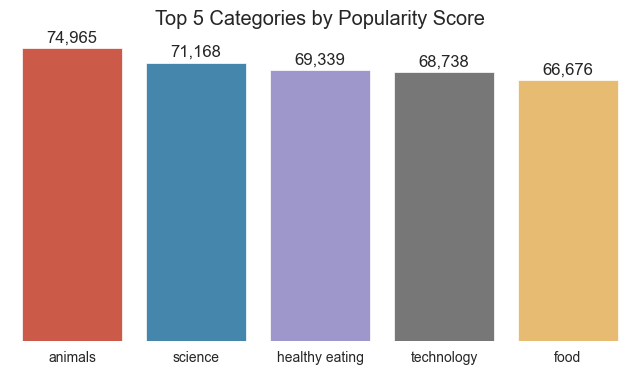

In [15]:
order = df_top_5_category.sort_values('score', ascending=False)['category'].values  # Sort the order

fig, ax = plt.subplots(figsize=(8, 4))

sns.barplot(data=df_top_5_category, 
            y='score', x='category',
            order=order, ax=ax)

# Add value labels on top of each bar
for p in ax.containers:
    ax.bar_label(p, label_type='edge', padding=2, fontsize=12, labels=[f"{int(val):,}" for val in p.datavalues])

# Set limits for X-axis and text
ax.set(
    ylabel='',
    xlabel='',
    title='Top 5 Categories by Popularity Score'
)

# Remove y-axis tick labels
ax.set_yticklabels([])

# Remove grid lines
ax.grid(False)

# Remove outer box
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

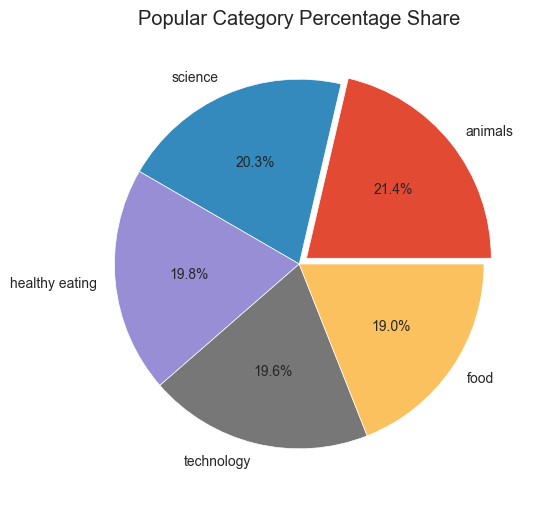

In [16]:
# Calculate the percentage for each category
category_percentages = df_top_5_category['score'] / df_top_5_category['score'].sum() * 100

# Get the index with the highest score
max_score_index = category_percentages.idxmax()

# Create the explode list with 0.05 offset for the highest score category, and 0 for the rest
explode = [0.05 if i == max_score_index else 0 for i in range(len(category_percentages))]

# Plot the pie chart
fig, ax = plt.subplots(figsize=(8, 6))

ax.pie(category_percentages, labels=df_top_5_category['category'], autopct='%1.1f%%', explode=explode)

# Set title
ax.set_title('Popular Category Percentage Share')

plt.show()

Now we will use the new dataset to answer the remaining questions

**Q: How many unique categories are there?**

Answer: 16 categories

In [17]:
df_copy = df.copy()

In [18]:
df_copy.category.nunique()

16

In [19]:
for x in df_copy.category.unique():
    print(x)

studying
healthy eating
dogs
public speaking
science
tennis
food
fitness
soccer
education
travel
veganism
cooking
technology
animals
culture


**Question: What is the total number of reactions for the most popular category? Additionally, how many reactions are there for the top 5 and top 10 popular categories combined?**

Answer: The category "Animals" has received 1897 reactions, making it the most reacted category. The combined number of reactions for the top 5 popular categories is 8807, while the top 10 popular categories have accumulated a total of 16684 reactions.
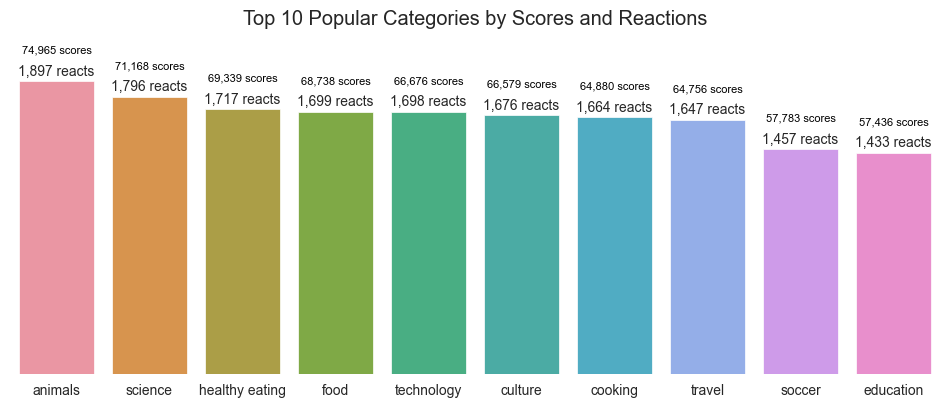

In [20]:
df_copy.sample(3)

,content_id,category_type,category,reaction_type,datetime,sentiment,score
12849,3a7b85dd-717e-4460-8144-498fdbc9380c,video,education,indifferent,2021-05-11 15:24:33,neutral,20
12836,16fb5dcb-4349-4831-acf2-8c116ad7dae5,audio,technology,indifferent,2020-12-27 19:52:07,neutral,20
16158,145ed259-6151-4021-bc13-a0b5482e5bd8,photo,technology,intrigued,2021-02-17 07:22:15,positive,45


In [21]:
df_top_10_cat = (
    df_copy
    .groupby('category')
    .agg({'score': 'sum', 'reaction_type': 'count'})
    .reset_index()
    .rename(columns={'reaction_type': 'reactions'})
    .nlargest(10, 'score')
)
df_top_10_cat

,category,score,reactions
0,animals,74965,1897
9,science,71168,1796
7,healthy eating,69339,1717
12,technology,68738,1698
6,food,66676,1699
2,culture,66579,1676
14,travel,64880,1647
1,cooking,64756,1664
10,soccer,57783,1457
4,education,57436,1433


In [22]:
df_top_5_cat = (
    df_copy
    .groupby('category')
    .agg({'score': 'sum', 'reaction_type': 'count'})
    .reset_index()
    .rename(columns={'reaction_type': 'reactions'})
    .nlargest(5, 'score')
)
df_top_5_cat

,category,score,reactions
0,animals,74965,1897
9,science,71168,1796
7,healthy eating,69339,1717
12,technology,68738,1698
6,food,66676,1699


In [23]:
df_top_5_cat.reactions.sum(), df_top_10_cat.reactions.sum()

(8807, 16684)

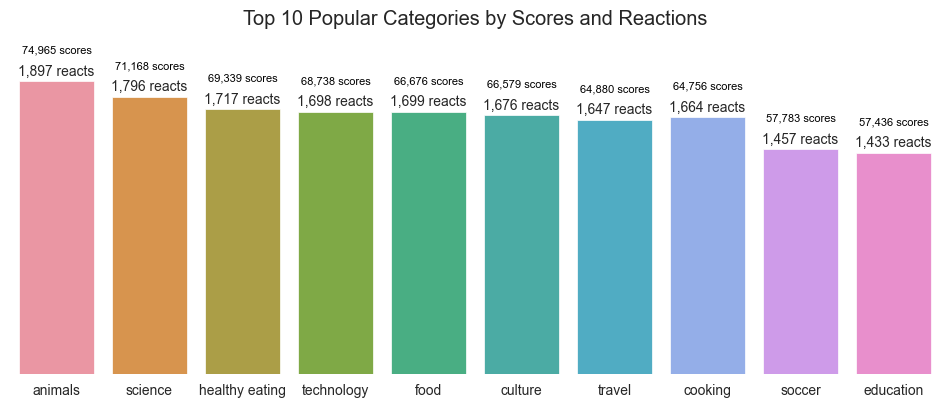

In [24]:
order = df_top_10_cat.sort_values(by=['score', 'reactions'], ascending=[False, False])['category'].values

fig, ax = plt.subplots(figsize=(12, 4))

sns.barplot(data=df_top_10_cat, 
            y='reactions', x='category',
            order=order, ax=ax)

# Add value labels on top of each bar
for p in ax.containers:
    ax.bar_label(p, label_type='edge', padding=2, fontsize=10, labels=[f"{int(val):,} reacts" for val in p.datavalues])
    

# Plot transaction count above each bar
for i, p in enumerate(ax.patches):
    # Calculate the x and y coordinates for the text
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()

    # Format the transaction count label
    label = f"{df_top_10_cat.iloc[i]['score']:,} scores"

    # Add the label above the bar
    ax.annotate(label, (x, y), xytext=(0, 20), textcoords='offset points', ha='center', fontsize=8, color='black')

    
# Set limits for X-axis and text
ax.set(
    ylabel='',
    xlabel='',
)

ax.set_title('Top 10 Popular Categories by Scores and Reactions', pad=30)

# Remove y-axis tick labels
ax.set_yticklabels([])

# Remove grid lines
ax.grid(False)

# Remove outer box
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

**Q: What was the month with the most posts?**

Answer: The month with the most posts was January 2021, recording an impressive total of 781 posts. July 2020 had 778 posts, and August 2020 had 773 posts, making them the other months with notable post activity.

In [25]:
df_monthly = (
    df_copy
    .groupby(pd.Grouper(key='datetime', freq='MS'))
    .agg({'content_id': 'nunique'})
    .reset_index()
    .rename(columns={'content_id': 'post'})
)
df_monthly.sort_values('post', ascending=False)

,datetime,post
7,2021-01-01,781
1,2020-07-01,778
2,2020-08-01,773
4,2020-10-01,771
5,2020-11-01,768
11,2021-05-01,759
6,2020-12-01,756
8,2021-02-01,755
3,2020-09-01,754
9,2021-03-01,753


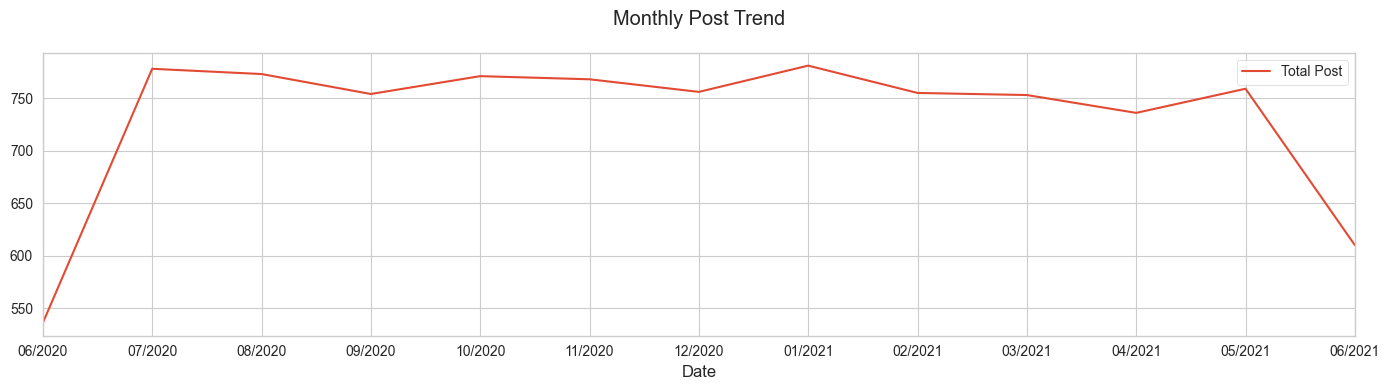

In [26]:
fig, ax = plt.subplots(figsize=(14, 4))

# Plotting the trend
df_monthly.plot(x='datetime', y='post', label='Total Post', ax=ax)

# Set X-axis tick labels to the 1st day of each month
ticks = pd.date_range(df_monthly['datetime'].min(), df_monthly['datetime'].max(), freq='MS')
ax.set_xticks(ticks)
ax.set_xticklabels(ticks.strftime('%m/%Y'))

ax.set_title('Monthly Post Trend', pad=20)
ax.set_ylabel('')
ax.set_xlabel('Date')
plt.tight_layout()
plt.show()

**Q: Day of the week with most reactions?**

Answer: The day of the week with the highest number of posts is Tuesday, with a total of 3581 reactions. Following closely behind is Friday, with 3552 reactions. These findings suggest that Monday is the most active day in terms of user engagement, as evidenced by the significant number of reactions observed. It is worth noting that these two days stand out from the rest, indicating a peak in user activity during midweek and towards the end of the workweek.

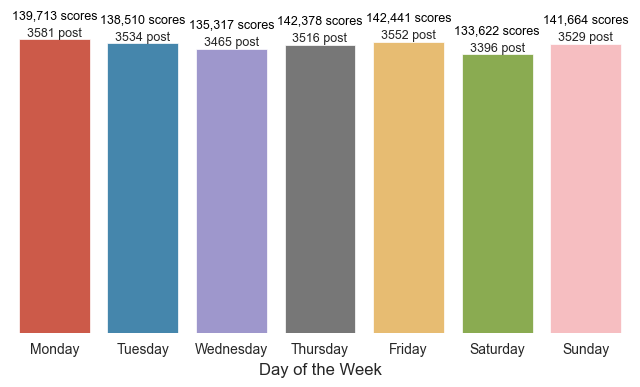

In [27]:
df_day_of_week = df_copy.copy()

# Extract day of the week
df_day_of_week['day_of_week'] = df_day_of_week['datetime'].dt.day_name()

# Calculate total sales sum and transaction count by day of the week
df_summary_by_day = (
    df_day_of_week
    .groupby('day_of_week')
    .agg({'content_id': 'count', 'score': 'sum'})
    .reset_index()
    .rename(columns={'content_id': 'post'})
)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the 'day_of_week' column to the Categorical data type with the specified order
df_summary_by_day['day_of_week'] = pd.Categorical(df_summary_by_day['day_of_week'], categories=day_order, ordered=True)
df_summary_by_day = df_summary_by_day.sort_values('day_of_week')
df_summary_by_day = df_summary_by_day.reset_index(drop=True)

fig, ax = plt.subplots(figsize=(8, 4))

sns.barplot(data=df_summary_by_day, x='day_of_week', y='post', ax=ax)

# Remove grid lines
ax.grid(False)

# Remove y-axis tick labels
ax.set_yticklabels([])

# Remove outer box
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add value labels on top of each bar
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=9, labels=[f"{int(val)} post" for val in p.datavalues])

# Plot transaction count above each bar
for i, p in enumerate(ax.patches):
    # Calculate the x and y coordinates for the text
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()

    # Format the transaction count label
    label = f"{df_summary_by_day['score'][i]:,} scores"

    # Add the label above the bar
    ax.annotate(label, (x, y), xytext=(0, 15), textcoords='offset points', ha='center', fontsize=9, color='black')

plt.xlabel('Day of the Week')
plt.ylabel('')
plt.show()

In [28]:
df_summary_by_day.sort_values('post', ascending=False)

,day_of_week,post,score
0,Monday,3581,139713
4,Friday,3552,142441
1,Tuesday,3534,138510
6,Sunday,3529,141664
3,Thursday,3516,142378
2,Wednesday,3465,135317
5,Saturday,3396,133622


### Logistic Regression

**Sentiments**

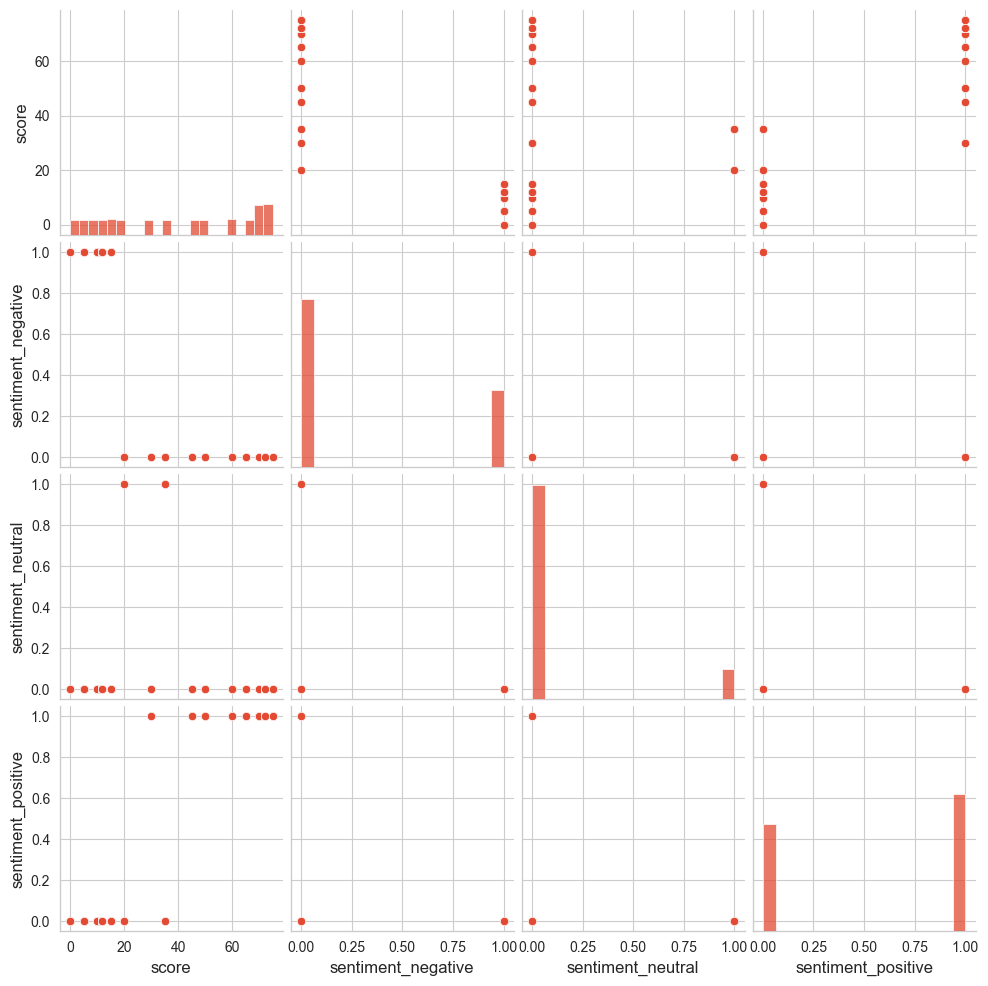

In [29]:
from sklearn.preprocessing import LabelEncoder

df_sentiment = df_copy.copy()

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Perform one-hot encoding on the 'sentiment' column since it is not ordinal. If ordinal use label encoding.
df_encoded = pd.get_dummies(df_sentiment['sentiment'], prefix='sentiment')

# Concatenate the encoded columns with the original dataframe
df_sentiment = pd.concat([df_sentiment, df_encoded], axis=1)
df_sentiment.head()

sns.pairplot(df_sentiment)

In [30]:
correlation = df_sentiment['sentiment_positive'].corr(df_sentiment['score'])
print('Correlation Coefficient:', correlation)

Correlation Coefficient: 0.8723702018710573


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Save X and y data into variables
X = df_sentiment[["score"]]
y = df_sentiment["sentiment_positive"]

# Split dataset into training and holdout datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

clf = LogisticRegression().fit(X_train, y_train)

In [32]:
clf.coef_

array([[0.21209329]])

In [33]:
(np.exp(clf.coef_) - 1).round(2)

array([[0.24]])

For every one unit increase in the predictor variable ('score'), we expect the odds of 'sentiment_positive' to increase by approximately 24%.

In [34]:
clf.intercept_

array([-6.97288495])

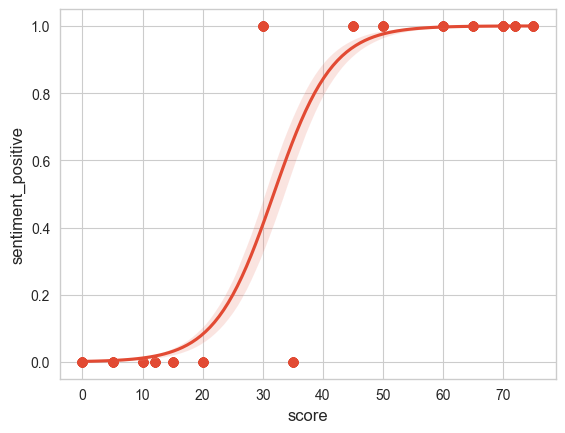

In [35]:
sample_to_plot = df_sentiment.sample(n=1000, random_state=16)
sns.regplot(x='score', y='sentiment_positive', data=sample_to_plot, logistic=True);

In [36]:
# Print out the predicted labels
clf.predict(X_test)

array([0, 1, 1, ..., 0, 1, 1], dtype=uint8)

In [37]:
clf.predict_proba(X_test)[::,-1]

array([0.35203953, 0.99683588, 0.92899237, ..., 0.00269833, 0.9996195 ,
       0.97421351])

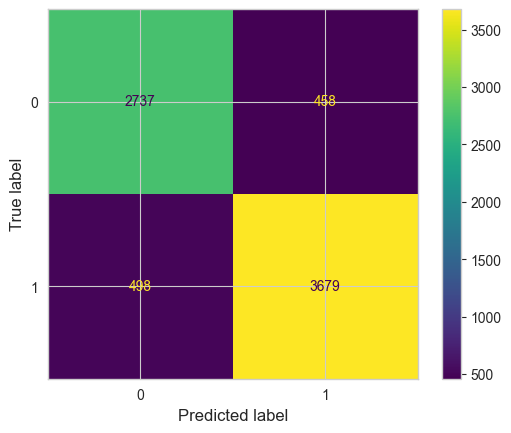

In [38]:
import sklearn.metrics as metrics

y_pred = clf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot();

- True negatives: The number of sentiment that are not "positive" that the model accurately predicted is 2766.
- False negatives: The number of sentiment that are "positive" that the model inaccurately predicted is 458.
- False positives: The number of sentiment that are not "positive" that the model inaccurately predicted is 497.
- True positives: The number of sentiment that are "positive" that the model accurately predicted is 3672.

**Precision**

Precision measures the proportion of positive predictions that were true positives. Precision is equal to the number of true positives divided by the sum of true positives and false positives.

In [39]:
metrics.precision_score(y_test, y_pred)

0.8892917573120619

**Recall**

Recall measures the proportion of positives that the model was able to identify correctly. Recall is equal to the number of true positives divided by the sum of true positives and false negatives.

In [40]:
metrics.recall_score(y_test, y_pred)

0.8807756763227197

**Accuracy**

Accuracy is the proportion of data points that were correctly categorized. Accuracy is equal to the sum of true positives and true negatives divided by the total number of predictions

In [41]:
metrics.accuracy_score(y_test, y_pred)

0.8703201302224634

**F1**

F1-score, also known as the F1 measure, is a popular metric used to evaluate the performance of a classification model. It combines precision and recall into a single score, providing a balanced evaluation of the model's ability to correctly classify positive samples while avoiding false positives and false negatives.

The F1-score is particularly useful when dealing with imbalanced datasets, where one class is significantly more prevalent than the other. In such cases, accuracy may not be an adequate metric since the model could achieve high accuracy by simply predicting the majority class all the time.

The F1-score is calculated using the following formula:

F1-score = 2 * (precision * recall) / (precision + recall)

- Precision: It is the ratio of true positive predictions to the total number of positive predictions. Precision answers the question, "Of all the samples the model classified as positive, how many were actually positive?" A high precision means the model is making fewer false positive predictions.

- Recall: It is the ratio of true positive predictions to the total number of actual positive samples. Recall answers the question, "Of all the positive samples in the dataset, how many did the model correctly predict as positive?" A high recall means the model is capturing a significant portion of the positive samples.

The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. It ranges from 0 to 1, where a perfect F1-score is 1.0, indicating a model that has both high precision and high recall.

A high F1-score indicates a model that performs well in terms of correctly classifying positive samples while minimizing false positives and false negatives. In situations where both precision and recall are important, the F1-score is a valuable metric for model evaluation.

In [42]:
metrics.f1_score(y_test, y_pred)

0.885013230695213

**ROC and AUC**

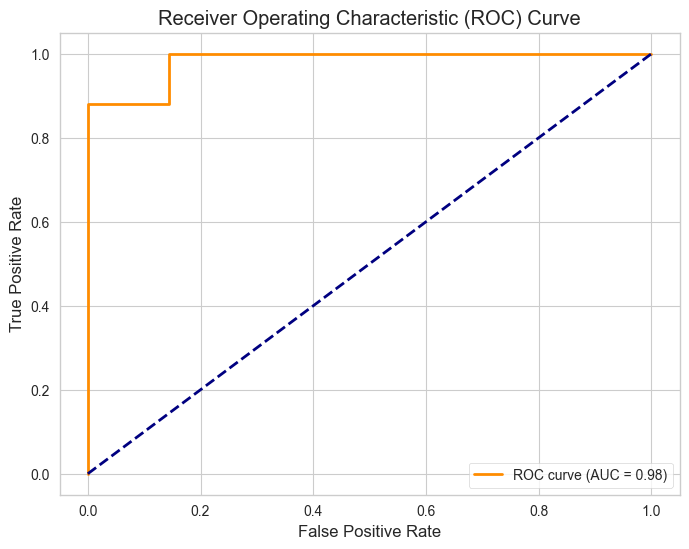

In [43]:
# Predict probabilities on the test set
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

# Calculate the AUC (Area Under the Curve)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Testing the model in a dummy dataset.

In [44]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate random data for the new dataset
num_rows = 1_000_000

content_ids = np.random.choice(['97522e57-d9ab-4bd6-97bf-c24d952602d2', '75d6b589-7fae-4a6d-b0d0-752845150e56'], size=num_rows)
reaction_types = np.random.choice(['disgust', 'dislike', 'scared', 'interested', 'intrigued', 'worried', 'cherish'], size=num_rows)
datetimes = pd.date_range(start='2022-01-01', end='2022-04-10', periods=num_rows)
category_type = np.random.choice(['photo', 'video', 'GIF', 'audio'], size=num_rows)
categories = np.random.choice([
    'studying',
    'healthy eating',
    'technology',
    'food',
    'cooking',
    'dogs',
    'soccer',
    'public speaking',
    'science',
    'tennis',
    'travel',
    'fitness',
    'education',
    'veganism',
    'animals',
    'culture'
], size=num_rows)
sentiments = np.random.choice(['negative', 'positive', 'neutral'], size=num_rows)
scores = np.random.randint(0, 100, size=num_rows)

# Create the new DataFrame
data = {
    'content_id': content_ids,
    'reaction_type': reaction_types,
    'datetime': datetimes,
    'category_type': category_type,
    'category': categories,
    'sentiment': sentiments,
    'score': scores
}

df_new = pd.DataFrame(data)

# Perform one-hot encoding on the 'sentiment' column
df_encoded_new = pd.get_dummies(df_new['sentiment'], prefix='sentiment')

# Concatenate the encoded columns with the original dataframe
df_new = pd.concat([df_new, df_encoded_new], axis=1)

In [45]:
df_new.shape

(1000000, 10)

In [46]:
# Save X and y data into variables from the new dataset
X_new = df_new[["score"]]
y_new = df_new["sentiment_positive"]

# Use the trained model to predict sentiment on the new dataset
y_pred_new = clf.predict(X_new)

# Calculate the accuracy on the new dataset
accuracy_new = metrics.accuracy_score(y_new, y_pred_new)

# Calculate the recall on the new dataset
recall_new = metrics.recall_score(y_new, y_pred_new)

# Calculate the precision on the new dataset
precision_new = metrics.precision_score(y_new, y_pred_new)

# Calculate the F1-score on the new dataset
f1_new = metrics.f1_score(y_new, y_pred_new)

# Print the evaluation metrics on the new dataset
print("Accuracy on the new dataset:", accuracy_new)
print("Recall on the new dataset:", recall_new)
print("Precision on the new dataset:", precision_new)
print("F1-score on the new dataset:", f1_new)

Accuracy on the new dataset: 0.443198
Recall on the new dataset: 0.6701065176596642
Precision on the new dataset: 0.3339393713412133
F1-score on the new dataset: 0.445746457787095
